# **Task:**
---

1. Implement a max-heap in terms of arrays thought of as binary trees.
2. Use the above implementation to implement a priority queue.

# **Libraries:**
---

In [20]:
import random
import matplotlib.pyplot as plt
import networkx as nx
import math

# **Task-1: Implementing Max-heap (Arrays thought of as binary trees):-**
---

The max-heap is defined as a binary tree where each parent node satisfies $t[\gamma] \ge t[p]$, with the following key equations:

- Parent index: $\gamma = \lfloor (p-1)/2 \rfloor$
- Left child index: $\lambda = 2p+1$
- Right child index: $\rho = 2p+2$

## **1.1 Code Implimentation:-**

We define the fundamental operations for a max-heap:
- **siftup**: Restores the heap property upward when a new element is inserted.
- **siftdown**: Restores the heap property downward after deletion or modification.
- **push**: Inserts a new element by appending it and then calling siftup.
- **pop**: Removes and returns the maximum element (at the root) and then fixes the heap using siftdown.
- **change**: Updates the element at a given index and repairs the heap (choosing siftup or siftdown based on whether the new value is greater or smaller).
- **extract**: Removes an element from an arbitrary position.
- **heapify**: Converts an unordered list into a valid max-heap by calling siftdown on all non-leaf nodes.

In [21]:
def siftup(t, p):
    gamma = (p - 1) // 2
    if p > 0 and gamma >= 0 and t[gamma] < t[p]:
        t[p], t[gamma] = t[gamma], t[p]
        siftup(t, gamma)

def siftdown(t, p):
    n = len(t)
    q = p
    left = 2 * p + 1
    right = 2 * p + 2
    if left < n and t[left] > t[q]:
        q = left
    if right < n and t[right] > t[q]:
        q = right
    if q != p:
        t[p], t[q] = t[q], t[p]
        siftdown(t, q)

def push(t, a):
    t.append(a)
    siftup(t, len(t) - 1)

def pop(t):
    n = len(t)
    if n == 0:
        raise IndexError("pop from empty heap")
    a = t[0]
    t[0] = t[-1]
    t.pop()
    if t:
        siftdown(t, 0)
    return a

def change(t, p, b):
    a = t[p]
    t[p] = b
    if b > a:
        siftup(t, p)
    else:
        siftdown(t, p)

def extract(t, p):
    n = len(t)
    if p >= n:
        raise IndexError("index out of range")
    a = t[p]
    t[p] = t[-1]
    t.pop()
    if p < len(t):
        if t[p] > a:
            siftup(t, p)
        else:
            siftdown(t, p)
    return a

def heapify(t):
    n = len(t)
    for i in range((n // 2) - 1, -1, -1):
        siftdown(t, i)

For the first example, I have shown the use of the max-heap functions:
- We push a series of values into an initially empty heap.
- We pop the maximum element from the heap.
- We change the value at a specific index and then extract an element from another index.
- Finally, we apply heapify to an unsorted list to build a valid max-heap.

In [22]:
print("Example 1: Demonstrating all heap operations.\n")
heap = []
for x in [5, 3, 17, 10, 84, 19, 6, 22, 9]:
    push(heap, x)
    print("After push({}): {}".format(x, heap))
max_elem = pop(heap)
print("\nAfter pop(): Max element = {}, Heap = {}".format(max_elem, heap))
print("\nBefore change: Heap =", heap)
change(heap, 2, 100)
print("After change at index 2 to 100: Heap =", heap)
extracted = extract(heap, 1)
print("\nAfter extract() at index 1: Extracted = {}, Heap = {}".format(extracted, heap))
unsorted = [3, 1, 6, 5, 2, 4]
print("\nBefore heapify, unsorted list:", unsorted)
heapify(unsorted)
print("After heapify, max-heap:", unsorted)

Example 1: Demonstrating all heap operations.

After push(5): [5]
After push(3): [5, 3]
After push(17): [17, 3, 5]
After push(10): [17, 10, 5, 3]
After push(84): [84, 17, 5, 3, 10]
After push(19): [84, 17, 19, 3, 10, 5]
After push(6): [84, 17, 19, 3, 10, 5, 6]
After push(22): [84, 22, 19, 17, 10, 5, 6, 3]
After push(9): [84, 22, 19, 17, 10, 5, 6, 3, 9]

After pop(): Max element = 84, Heap = [22, 17, 19, 9, 10, 5, 6, 3]

Before change: Heap = [22, 17, 19, 9, 10, 5, 6, 3]
After change at index 2 to 100: Heap = [100, 17, 22, 9, 10, 5, 6, 3]

After extract() at index 1: Extracted = 17, Heap = [100, 10, 22, 9, 3, 5, 6]

Before heapify, unsorted list: [3, 1, 6, 5, 2, 4]
After heapify, max-heap: [6, 5, 4, 1, 2, 3]


- Now for 2nd example the code below shows how to create a random list of integers and then convert it into a max-heap using the `heapify` function.

In [23]:
print("Example 2: Heapifying a random list.\n")
random_heap = [random.randint(0, 100) for _ in range(15)]
print("Random list before heapify:")
print(random_heap)
heapify(random_heap)
print("Random list after heapify (max-heap):")
print(random_heap)

Example 2: Heapifying a random list.

Random list before heapify:
[80, 55, 40, 64, 75, 87, 78, 18, 29, 54, 83, 99, 6, 27, 36]
Random list after heapify (max-heap):
[99, 83, 87, 64, 75, 80, 78, 18, 29, 54, 55, 40, 6, 27, 36]


## **1.2 Extra: Plotting the heaps:-**

Now this is an extra bit, but I thought it would be good to physically see the heapify implimentation results. Using the `matplotlib` and `networkx` libraries, We can build a graphical representation of the heap as a binary tree. The positions for nodes are computed based on the level and index within the level using the relations:

- Level: $\lfloor \log_2(i+1) \rfloor$
- Horizontal position based on the index within the level.

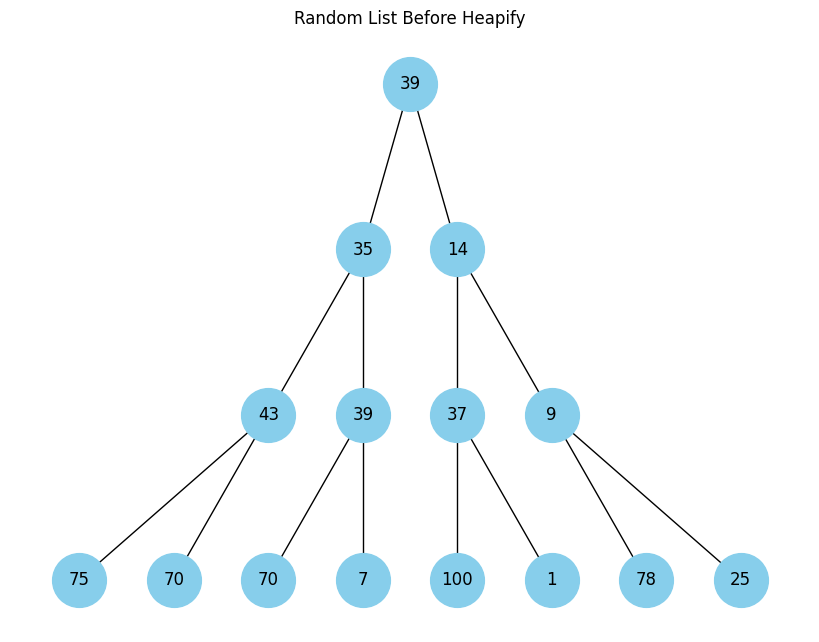

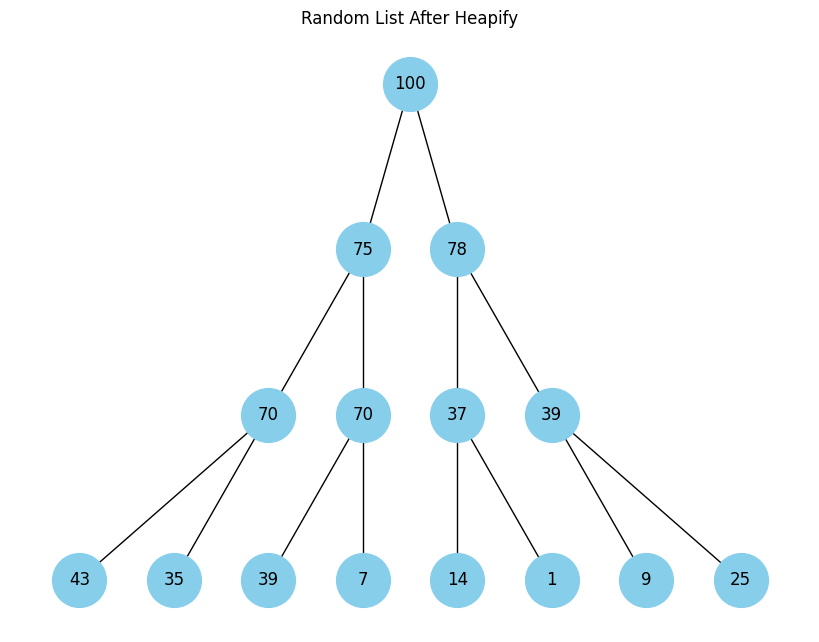

In [24]:
def build_heap_graph(heap):
    G = nx.DiGraph()
    pos = {}
    labels = {}
    n = len(heap)
    for i, val in enumerate(heap):
        G.add_node(i)
        labels[i] = str(val)
        level = math.floor(math.log2(i+1)) if i > 0 else 0
        index_in_level = i - (2**level - 1)
        x = index_in_level - (2**level - 1) / 2
        y = -level
        pos[i] = (x, y)
        left = 2 * i + 1
        right = 2 * i + 2
        if left < n:
            G.add_edge(i, left)
        if right < n:
            G.add_edge(i, right)
    return G, pos, labels

def plot_heap(heap, title="Heap"):
    G, pos, labels = build_heap_graph(heap)
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=False, arrows=False, node_size=1500, node_color="skyblue")
    nx.draw_networkx_labels(G, pos, labels)
    plt.title(title)
    plt.axis('off')
    plt.show()

random_heap = [random.randint(0, 100) for _ in range(15)]
plot_heap(random_heap, "Random List Before Heapify")
heapify(random_heap)
plot_heap(random_heap, "Random List After Heapify")

# **Task-2: Implementing the Priority Queues:-**
---

For this task, We define functions for a priority queue built on the max-heap:

- **enqueue:** Inserts a new element with an associated priority (stored as a tuple).
- **maximum:** Returns the element with the highest priority (the root of the heap).
- **extract_max:** Removes and returns the highest priority element.
- **change_priority:** Changes the priority of an element at a given index and repairs the heap.

In [25]:
def enqueue(pq, item, priority):
    push(pq, (priority, item))

def maximum(pq):
    if not pq:
        raise IndexError("maximum from empty priority queue")
    return pq[0]

def extract_max(pq):
    if not pq:
        raise IndexError("extract from empty priority queue")
    return pop(pq)

def change_priority(pq, index, new_priority):
    if index < 0 or index >= len(pq):
        raise IndexError("index out of range")
    old_priority, item = pq[index]
    change(pq, index, (new_priority, item))

For the 1st example, The code below demonstrates some priority queue operations:

- Several tasks are enqueued with different priorities.
- The maximum (highest priority) element is retrieved.
- The highest priority element is extracted.
- The priority of a task is then changed.

In [26]:
print("Priority Queue Example 1:\n")
pq = []
enqueue(pq, "task1", 5)
enqueue(pq, "task2", 3)
enqueue(pq, "task3", 10)
enqueue(pq, "task4", 1)
print("After enqueues:", pq)
print("Maximum element:", maximum(pq))
print("Extract max:", extract_max(pq))
print("After extraction:", pq)
change_priority(pq, 1, 8)
print("After changing priority at index 1 to 8:", pq)

Priority Queue Example 1:

After enqueues: [(10, 'task3'), (3, 'task2'), (5, 'task1'), (1, 'task4')]
Maximum element: (10, 'task3')
Extract max: (10, 'task3')
After extraction: [(5, 'task1'), (3, 'task2'), (1, 'task4')]
After changing priority at index 1 to 8: [(8, 'task2'), (5, 'task1'), (1, 'task4')]


- The code below provides another example of the priority queue by enqueuing multiple tasks with random priorities. It then extracts all elements one by one to demonstrate the order of extraction (highest priority first).

In [27]:
print("Priority Queue Example 2:\n")
pq2 = []
for i in range(1, 11):
    enqueue(pq2, f"task_{i}", random.randint(1, 20))
print("After enqueues:", pq2)
print("Extracting all elements in order:")
while pq2:
    print(extract_max(pq2))

Priority Queue Example 2:

After enqueues: [(19, 'task_2'), (17, 'task_9'), (10, 'task_6'), (17, 'task_5'), (13, 'task_4'), (6, 'task_3'), (9, 'task_7'), (7, 'task_1'), (8, 'task_8'), (4, 'task_10')]
Extracting all elements in order:
(19, 'task_2')
(17, 'task_9')
(17, 'task_5')
(13, 'task_4')
(10, 'task_6')
(9, 'task_7')
(8, 'task_8')
(7, 'task_1')
(6, 'task_3')
(4, 'task_10')
